# Vinayak Bhosale Assignment Submission

# The commented code i ran on my pc but tensorflow started having issues so i had to switch to google colaboratory

# And i have only considered these features categories = ["banana","duck","fish","jelly fish","lizard","lobster","scorpion", "stop watch"]

# Because my pc has only 8gb ram and its going to take too much training time so i have reduced the features

# importing the necessary libraries

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import cv2
# %matplotlib inline

# datadir = "C:/Users/Pinky/Desktop/dataset"
# categories = ["banana","duck","fish","jelly fish","lizard","lobster","scorpion",
#              "stop watch"]

# for category in categories:
#     path = os.path.join(datadir,category)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img))
#         plt.imshow(img_array)
#         plt.show()
#         break
#     break

# creating the training data set

In [2]:
# training_data = []

# def create_training_data():
#     for category in categories:
#         path = os.path.join(datadir,category)
#         class_num = categories.index(category)
#         for img in os.listdir(path):
#             try:
#                 img_array = cv2.imread(os.path.join(path,img))
#                 training_data.append([img_array,class_num])
#             except Exception as e:
#                 pass
            

# create_training_data()

# shuffling the data

In [3]:
# import random

# random.shuffle(training_data)

In [4]:
# X = []
# y = []

# for features,label in training_data:
#     X.append(features)
#     y.append(label)
    
# X = np.array(X).reshape(-1,64,64,3)

In [5]:
# import pickle

# pickle_out = open("X.pickle","wb")
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# considering only below features because of ram issue

In [10]:
categories = ["banana","duck","fish","jelly fish","lizard","lobster","scorpion",
            "stop watch"]

# loading the data from the pickle which i had saved earlier on my pc and imported it into google colab

In [46]:
import pickle

pickle_in = open("/content/X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in_y = open("/content/y.pickle","rb")
y = pickle.load(pickle_in_y)

In [47]:
X[0]

array([[[ 33,  64,  33],
        [ 35,  80,  47],
        [ 15,  85,  49],
        ...,
        [ 27, 124,  92],
        [ 49, 145, 115],
        [ 33, 129,  99]],

       [[ 25,  56,  25],
        [ 16,  59,  26],
        [  0,  54,  19],
        ...,
        [ 12, 113,  81],
        [ 35, 135, 105],
        [ 24, 124,  94]],

       [[ 20,  51,  20],
        [ 17,  58,  26],
        [  0,  60,  24],
        ...,
        [  1, 113,  79],
        [ 22, 134, 100],
        [ 21, 133,  99]],

       ...,

       [[154, 178, 178],
        [157, 178, 179],
        [166, 181, 183],
        ...,
        [ 53, 132,  89],
        [ 48, 128,  81],
        [ 24, 105,  56]],

       [[159, 183, 183],
        [160, 181, 182],
        [168, 183, 185],
        ...,
        [ 60, 144,  90],
        [ 50, 134,  75],
        [ 53, 138,  76]],

       [[165, 189, 189],
        [163, 184, 185],
        [169, 184, 186],
        ...,
        [ 62, 148,  88],
        [ 22, 109,  43],
        [ 33, 120,  52]]

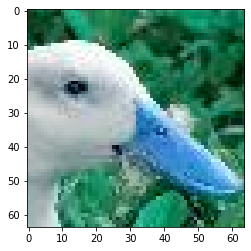

In [48]:
plt.imshow(X[0])

In [49]:
categories[y[0]]

'duck'

# Normalizing the data

In [50]:
X = X/255.0

In [51]:
X.shape

(3841, 64, 64, 3)

# converting y to categorical

In [53]:
from keras.utils import to_categorical
y_one_hot = to_categorical(y)
y_one_hot[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# importing necessary libraries and building the model

In [54]:
#Building the model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout, AveragePooling2D
from tensorflow.keras.layers import Flatten, MaxPooling2D

In [55]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3,3),activation="relu",input_shape =X.shape[1:] ))
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.15))

model.add(Conv2D(filters = 64,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters = 64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(units = 200,activation="relu"))
model.add(Dense(units = 500,activation="relu"))
model.add(Dropout(0.15))

model.add(Dense(units = 8 ,activation="softmax"))

In [56]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# training the model

In [60]:
history = model.fit(X,y_one_hot,batch_size = 32,epochs = 5,verbose=1)

Epoch 1/5
121/121 [==============================] - 59s 486ms/step - loss: 0.0336 - accuracy: 0.9893
Epoch 2/5
121/121 [==============================] - 59s 485ms/step - loss: 0.0428 - accuracy: 0.9878
Epoch 3/5
121/121 [==============================] - 59s 489ms/step - loss: 0.1092 - accuracy: 0.9680
Epoch 4/5
121/121 [==============================] - 59s 487ms/step - loss: 0.0600 - accuracy: 0.9789
Epoch 5/5
121/121 [==============================] - 59s 488ms/step - loss: 0.0645 - accuracy: 0.9810


In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

# plotting the accuracy and loss

No handles with labels found to put in legend.


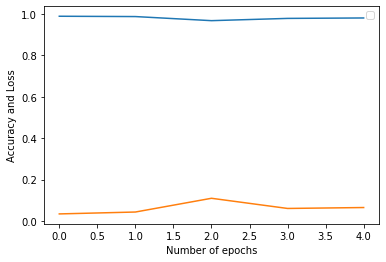

In [65]:
acc = history.history["accuracy"]
loss = history.history["loss"]
epoch = range(len(acc))

plt.plot(epoch,acc)
plt.plot(epoch,loss)
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy and Loss")
plt.legend()

In [64]:
acc

[0.9893257021903992,
 0.9877635836601257,
 0.9679771065711975,
 0.9789117574691772,
 0.9809945225715637]

In [66]:
loss

[0.03363124653697014,
 0.04278057441115379,
 0.10921942442655563,
 0.06004120036959648,
 0.06450390070676804]

# Testing the model

# loading the test data

In [69]:
pickle_in = open("/content/X_test.pickle","rb")
X_test = pickle.load(pickle_in)


In [78]:
X_test = np.array(X_test).reshape(-1,64,64,3)

In [79]:
X_test = X_test/255.0

In [86]:
X_test.shape

(159, 64, 64, 3)

# giving the test data as input to the model to predict the values

In [87]:
predict = model.predict_classes(X_test,batch_size=32,verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5/5 [==============================] - 1s 116ms/step


In [90]:
len(predict)

159

In [112]:
value = 158
categories[predict[value]]



'banana'

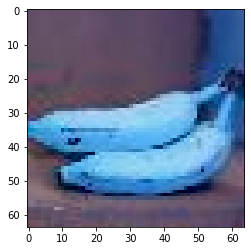

In [113]:
plt.imshow(X_test[value])